# 여행상품 신청여부 예측 경진대회

## 라이브러리

In [4]:
## 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 경로 지정

In [5]:
## 경로 설정
import os
os.chdir('C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\여행상품 신청여부 예측 경진대회')
os.getcwd()

'C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\여행상품 신청여부 예측 경진대회'

## 데이터 불러오기

In [6]:
## 데이터 불러오기
df=pd.read_csv('train.csv')
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [7]:
df.tail()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0
1954,1955,22.0,Company Invited,1,9.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,1.0,1,3,0,0.0,Executive,17853.0,1


- 데이터 특징 살펴보기

In [8]:
## 데이터 타입, 결측치, 변수명 등 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [9]:
df.shape

(1955, 20)

In [10]:
## 결측치 확인
df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [11]:
## 각각 변수의 통계량 확인
df.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [12]:
## 중복된 값 존재하는지 확인
df[df.duplicated()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


- value_counts()를 통해서 값들이 얼만큼 분포되어있는지 확인

In [13]:
df['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [14]:
df['DurationOfPitch'].value_counts()

9.0     199
7.0     126
8.0     122
6.0     116
16.0    114
14.0    112
15.0    105
10.0    103
12.0     85
11.0     83
13.0     83
17.0     75
23.0     41
30.0     39
22.0     36
31.0     34
25.0     32
27.0     31
32.0     30
20.0     29
35.0     29
24.0     27
26.0     27
29.0     27
28.0     25
21.0     24
18.0     23
33.0     22
19.0     18
34.0     18
36.0     15
5.0       3
Name: DurationOfPitch, dtype: int64

In [15]:
df['Occupation'].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

In [16]:
df['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [17]:
df['MaritalStatus'].value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [18]:
df[df['Gender']=='Fe Male'] 

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
11,12,31.0,Self Enquiry,1,9.0,Small Business,Fe Male,3,5.0,Deluxe,3.0,Unmarried,7.0,1,2,1,2.0,Manager,25555.0,0
57,58,40.0,Company Invited,1,15.0,Small Business,Fe Male,2,3.0,Standard,3.0,Unmarried,1.0,0,4,0,0.0,Senior Manager,28499.0,0
66,67,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,1,1,0.0,Senior Manager,28458.0,0
76,77,34.0,Self Enquiry,3,23.0,Salaried,Fe Male,4,4.0,Standard,5.0,Unmarried,4.0,1,5,0,1.0,Senior Manager,27242.0,1
260,261,54.0,Self Enquiry,3,7.0,Small Business,Fe Male,3,4.0,Deluxe,5.0,Unmarried,2.0,0,2,1,2.0,Manager,27059.0,0
330,331,60.0,Self Enquiry,3,32.0,Salaried,Fe Male,3,4.0,Standard,5.0,Unmarried,2.0,0,3,1,1.0,Senior Manager,26315.0,0
348,349,41.0,Self Enquiry,1,23.0,Salaried,Fe Male,3,4.0,Standard,3.0,Unmarried,8.0,1,4,1,1.0,Senior Manager,26623.0,0
369,370,60.0,Company Invited,3,7.0,Salaried,Fe Male,3,5.0,Deluxe,3.0,Unmarried,2.0,0,5,1,2.0,Manager,24151.0,0
374,375,42.0,Company Invited,1,9.0,Salaried,Fe Male,4,5.0,Deluxe,3.0,Unmarried,4.0,1,2,0,1.0,Manager,25489.0,0
408,409,60.0,Self Enquiry,3,32.0,Salaried,Fe Male,5,4.0,Standard,5.0,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0,0


In [19]:
df1=df.copy()
df1.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [20]:
## Fe Male이 Female과 같다고 생각하여 Fe Male -> Female로 변경
df1.replace('Fe Male','Female', inplace=True)

In [21]:
df1[df1['Gender']=='Fe Male']

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


In [22]:
## single이 unmarried와 유사한 의미라고 생각하여 single -> unmarried로 변경
df1.replace('Single','Unmarried', inplace=True)

## 시각화

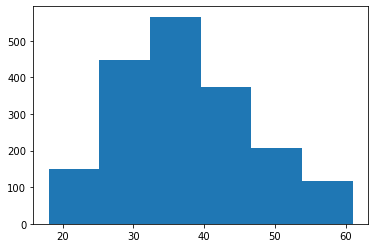

In [23]:
plt.hist('Age', data=df1, bins=6)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

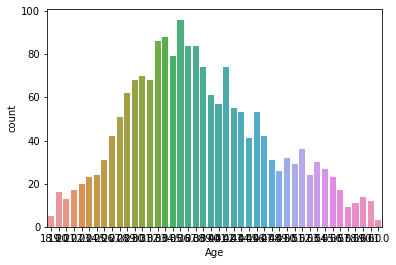

In [24]:
sns.countplot(x='Age', data=df1)

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

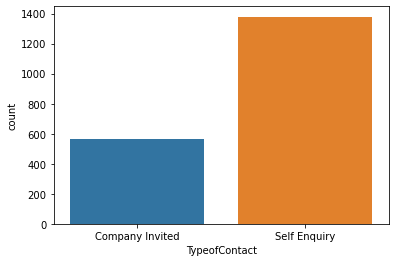

In [25]:
sns.countplot(x='TypeofContact', data=df1)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

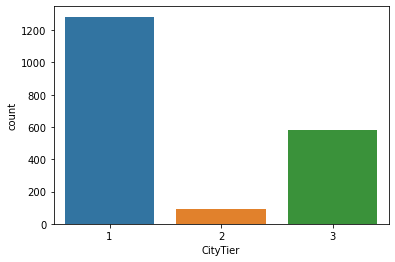

In [26]:
sns.countplot(x='CityTier', data=df1)

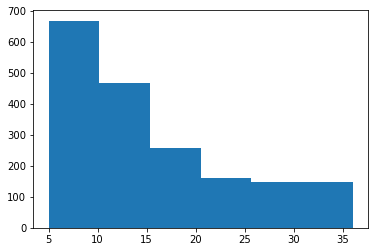

In [27]:
plt.hist('DurationOfPitch', data=df1, bins=6)
plt.show()

<AxesSubplot:xlabel='DurationOfPitch', ylabel='count'>

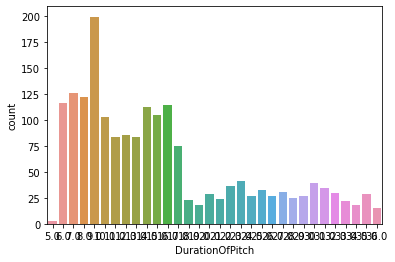

In [28]:
sns.countplot(x='DurationOfPitch', data=df1)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

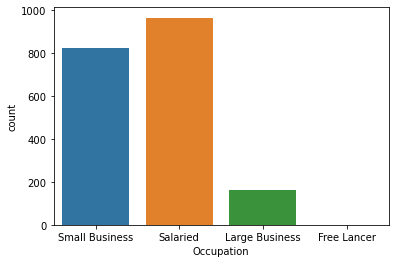

In [29]:
sns.countplot(x='Occupation', data=df1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

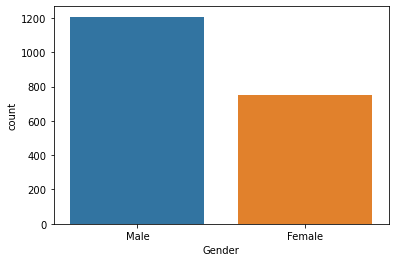

In [30]:
sns.countplot(x='Gender', data=df1)

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

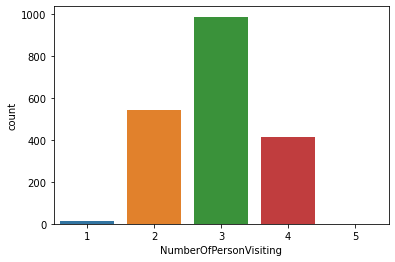

In [31]:
sns.countplot(x='NumberOfPersonVisiting', data=df1)

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

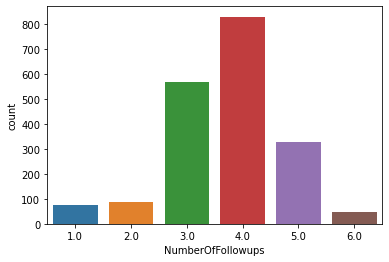

In [32]:
sns.countplot(x='NumberOfFollowups', data=df1)

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

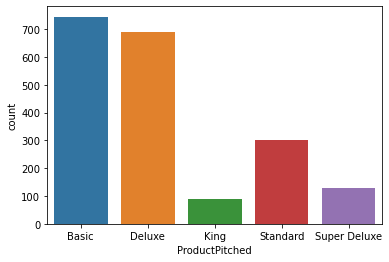

In [33]:
sns.countplot(x='ProductPitched', data=df1)

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

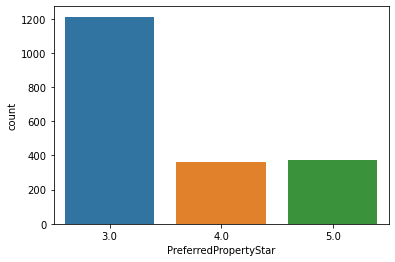

In [34]:
sns.countplot(x='PreferredPropertyStar', data=df1)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

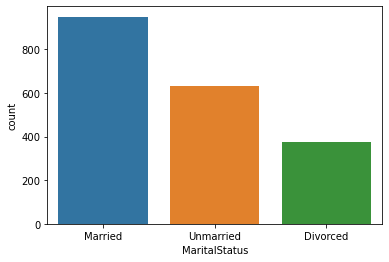

In [35]:
sns.countplot(x='MaritalStatus', data=df1)

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

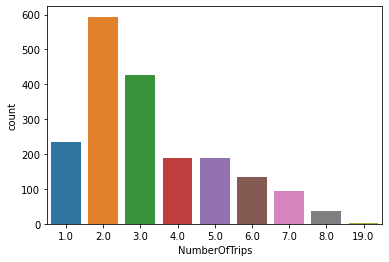

In [36]:
sns.countplot(x='NumberOfTrips', data=df1)

<AxesSubplot:xlabel='Passport', ylabel='count'>

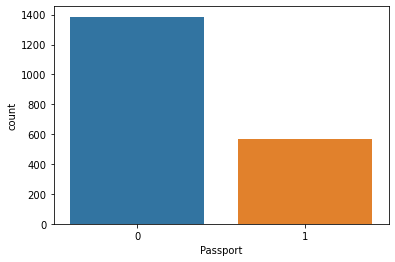

In [37]:
sns.countplot(x='Passport', data=df1)

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='count'>

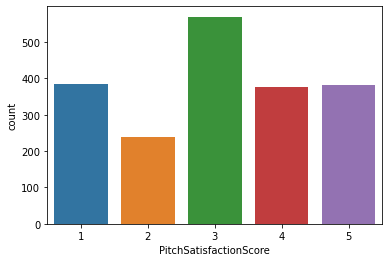

In [38]:
sns.countplot(x='PitchSatisfactionScore', data=df1)

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

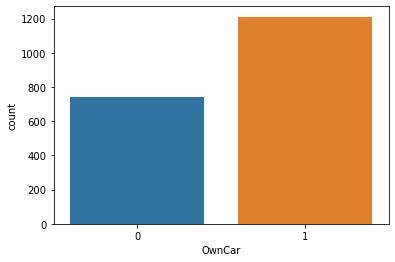

In [39]:
sns.countplot(x='OwnCar', data=df1)

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

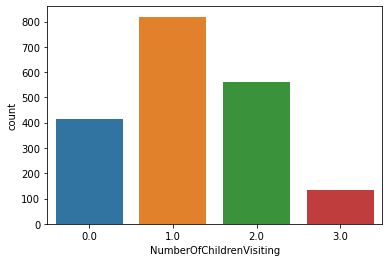

In [40]:
sns.countplot(x='NumberOfChildrenVisiting', data=df1)

<AxesSubplot:xlabel='Designation', ylabel='count'>

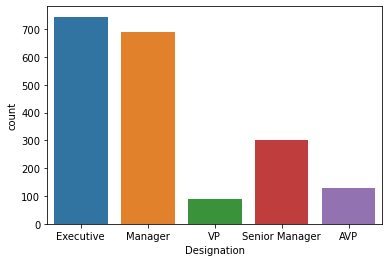

In [41]:
sns.countplot(x='Designation', data=df1)

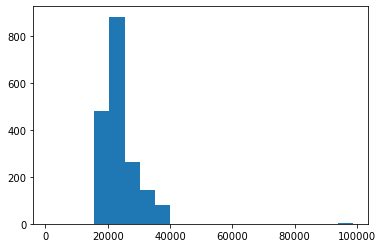

In [42]:
plt.hist('MonthlyIncome', data=df1, bins=20)
plt.show()

In [43]:
df1[df1['MonthlyIncome']>39000]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
604,605,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0,0
1338,1339,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0,0


In [44]:
df1[df1['MonthlyIncome']<=10000]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
189,190,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Unmarried,4.0,1,5,0,0.0,Manager,1000.0,0


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

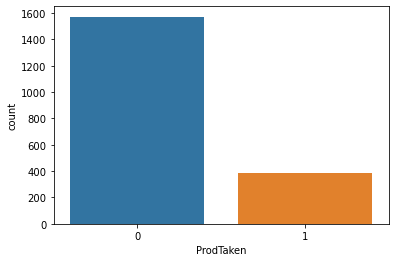

In [45]:
sns.countplot(x='ProdTaken', data=df1)

- boxplot을 통해 이상치 확인

<AxesSubplot:xlabel='MonthlyIncome'>

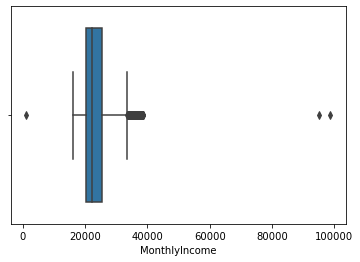

In [46]:
sns.boxplot(x='MonthlyIncome', data=df1)

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

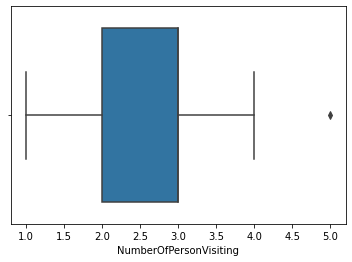

In [47]:
sns.boxplot(x='NumberOfPersonVisiting', data=df1)

<AxesSubplot:xlabel='NumberOfTrips'>

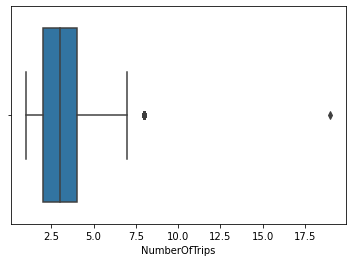

In [48]:
sns.boxplot(x='NumberOfTrips', data=df1)

- 상관관계

In [49]:
df1.corr()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
id,1.000000,0.006332,-0.022072,0.002178,0.036337,-0.010110,-0.011251,0.041546,0.009294,-0.040459,-0.013982,0.028112,0.032920,-0.048933
Age,0.006332,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,-0.022072,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.002178,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.036337,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,-0.010110,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.011251,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.041546,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.009294,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,-0.040459,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736


<AxesSubplot:>

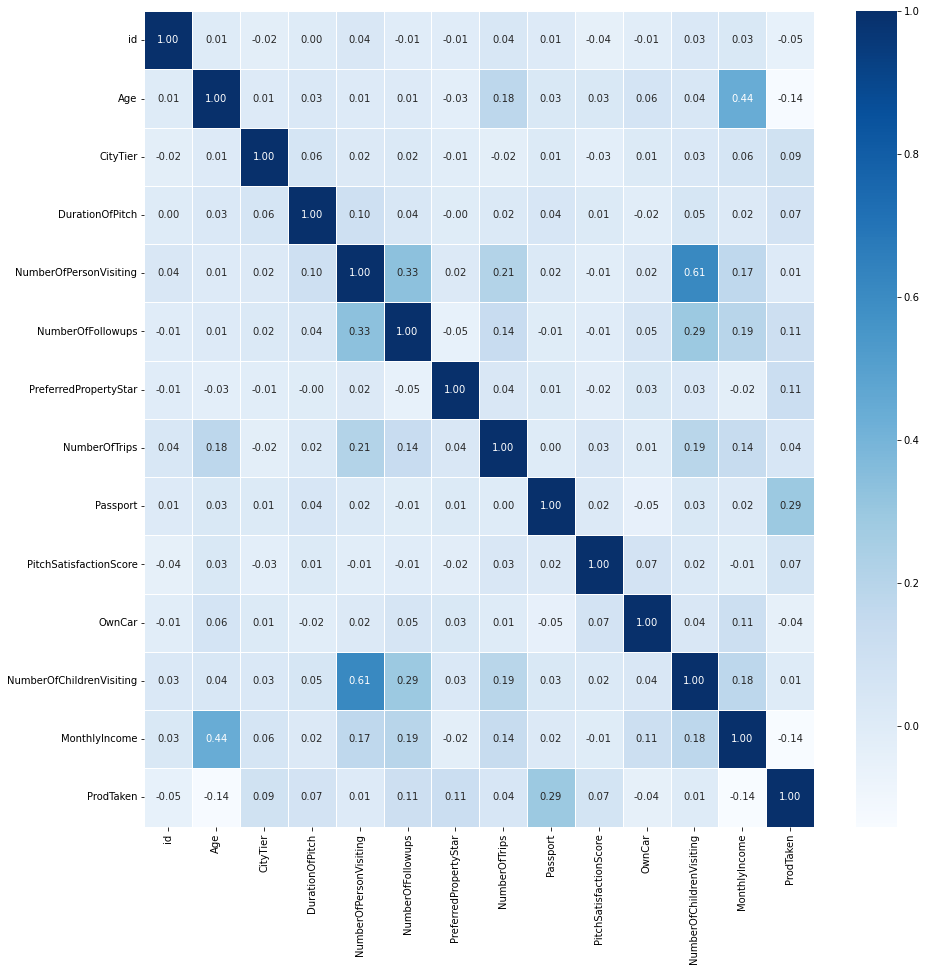

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 데이터 가공

### - 나이 데이터 가공

In [51]:
df2=df1.copy()

In [52]:
## 20살 미만 -> 10대
## 20살이상~30살미만 -> 20대
## 30살이상~40살미만 -> 30대
## 40살이상~50살미만 -> 40대
## 50살이상~60살미만 -> 50대
## 60살이상~70살미만 -> 60대
## 결측치 -> NaN값

In [53]:
def get_age(A):
    if A < 20:
        age = '10대'
    elif A < 30:
        age = '20대'
    elif A < 40:
        age = '30대'
    elif A < 50:
        age = '40대'
    elif A < 60:
        age = '50대'
    elif A < 70:
        age = '60대'
    else:
        age = 'NaN값'
    return age

In [54]:
df2['age']=df2['Age'].apply(lambda A:get_age(A))
df2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,age
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,...,Married,3.0,0,1,0,1.0,Executive,20384.0,0,20대
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,...,Unmarried,1.0,1,5,1,0.0,Manager,19599.0,1,30대
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,...,Married,2.0,0,4,1,0.0,Manager,NaN,0,40대
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,...,Married,3.0,0,4,0,1.0,Executive,21274.0,1,20대
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,...,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,...,Unmarried,2.0,0,1,1,2.0,Executive,20723.0,0,20대
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,...,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0,40대
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,...,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0,30대
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,...,Married,3.0,0,1,1,2.0,Manager,22218.0,0,20대


<AxesSubplot:xlabel='age', ylabel='count'>

C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


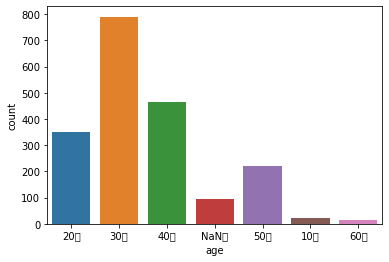

In [55]:
sns.countplot(x='age', data=df2)

<AxesSubplot:xlabel='age', ylabel='count'>

C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


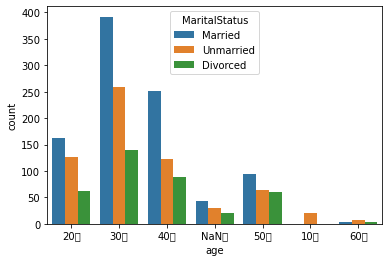

In [56]:
sns.countplot(x='age', hue='MaritalStatus' ,data=df2)

<AxesSubplot:xlabel='age', ylabel='count'>

C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


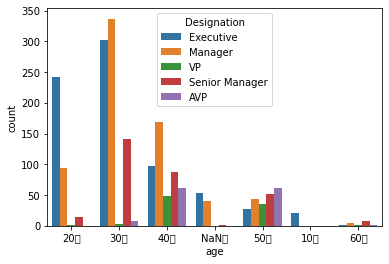

In [57]:
sns.countplot(x='age', hue='Designation' ,data=df2)

In [58]:
## maritalstatus, Designation 둘 중 뭐가 더 age와 관련있는지 countplot을 그려봤는데 음... 잘 모르겠다... 
## 그나마 maritalstatus가 age와 관련있는 것 같다. 
##왜냐하면 보통 나이가 많을 수록 Executive 비율이 높은 거라 생각했는데 Designation 그래프를 보면 30대가 Executive 비율이 많기 때문이다.

### - DurationOfPitch 데이터 가공

In [59]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [60]:
df1['DurationOfPitch'].max()

36.0

In [61]:
## 5일 미만 -> 0~5
## 5일이상~10일미만 -> 5~10
## 10일이상~15일미만 -> 10~15
## 15일이상~20일미만 -> 15~20
## 20일이상~25일미만 -> 20~25
## 25일이상~30일미만 -> 25~30
## 30일이상~35일미만 -> 25~30
## 35일이상~40일미만 -> 25~30
## 결측치 -> NaN값

In [62]:
def get_duration(D):
    if D < 5:
        Durationofpitch = '0~5'
    elif D < 10:
        Durationofpitch = '5~10'
    elif D < 15:
        Durationofpitch = '10~15'
    elif D < 20:
        Durationofpitch = '15~20'
    elif D < 25:
        Durationofpitch = '20~25'
    elif D < 30:
        Durationofpitch = '25~30'
    elif D < 35:
        Durationofpitch = '30~35'
    elif D < 40:
        Durationofpitch = '35~40'    
    else:
        Durationofpitch = 'NaN값'
    return Durationofpitch

In [63]:
df2['Durationofpitch']=df2['DurationOfPitch'].apply(lambda D:get_duration(D))
df2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,age,Durationofpitch
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,...,3.0,0,1,0,1.0,Executive,20384.0,0,20대,10~15
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,...,1.0,1,5,1,0.0,Manager,19599.0,1,30대,NaN값
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,...,2.0,0,4,1,0.0,Manager,NaN,0,40대,NaN값
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,...,3.0,0,4,0,1.0,Executive,21274.0,1,20대,5~10
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,...,2.0,0,3,1,0.0,Manager,19907.0,0,40대,5~10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,...,2.0,0,1,1,2.0,Executive,20723.0,0,20대,10~15
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,...,1.0,0,5,1,1.0,AVP,31595.0,0,40대,5~10
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,...,7.0,0,2,1,2.0,Executive,21651.0,0,30대,25~30
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,...,3.0,0,1,1,2.0,Manager,22218.0,0,20대,30~35


<AxesSubplot:xlabel='Durationofpitch', ylabel='count'>

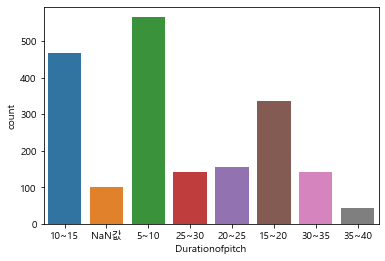

In [64]:
sns.countplot(x='Durationofpitch', data=df2)
## 0~5 -> 0이상 5미만 // 5~10 -> 5이상 10미만

In [65]:
df2.groupby('Durationofpitch')['ProdTaken'].sum()

Durationofpitch
10~15    84
15~20    75
20~25    35
25~30    34
30~35    41
35~40     5
5~10     91
NaN값     18
Name: ProdTaken, dtype: int64

In [66]:
df['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

### - MonthlyIncome 데이터 가공

In [67]:
df2['MonthlyIncome'].min()

1000.0

In [71]:
df2['MonthlyIncome'].max()

98678.0

In [69]:
## 2000미만 -> 1000대
## 2000이상~20000미만 -> 10000대
## 20000이상~30000미만 -> 20000대
## 30000이상~40000미만 -> 30000대
## 40000이상~90000미만 -> 90000대
## 결측치 -> NaN값

In [70]:
def get_Income(I):
    if I < 2000:
        Monthlyincome = '1000대'
    elif I < 20000:
        Monthlyincome = '10000대'
    elif I < 30000:
        Monthlyincome = '20000대'
    elif I < 40000:
        Monthlyincome = '30000대'
    elif I < 100000:
        Monthlyincome = '90000대' 
    else:
        Monthlyincome = 'NaN값'
    return Monthlyincome

In [72]:
df2['Monthlyincome']=df2['MonthlyIncome'].apply(lambda I:get_Income(I))
df2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,age,Durationofpitch,Monthlyincome
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,...,0,1,0,1.0,Executive,20384.0,0,20대,10~15,20000대
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,...,1,5,1,0.0,Manager,19599.0,1,30대,NaN값,10000대
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,...,0,4,1,0.0,Manager,NaN,0,40대,NaN값,NaN값
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,...,0,4,0,1.0,Executive,21274.0,1,20대,5~10,20000대
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,...,0,3,1,0.0,Manager,19907.0,0,40대,5~10,10000대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,...,0,1,1,2.0,Executive,20723.0,0,20대,10~15,20000대
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,...,0,5,1,1.0,AVP,31595.0,0,40대,5~10,30000대
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,...,0,2,1,2.0,Executive,21651.0,0,30대,25~30,20000대
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,...,0,1,1,2.0,Manager,22218.0,0,20대,30~35,20000대


In [73]:
df2.groupby('Monthlyincome')['ProdTaken'].sum()

Monthlyincome
10000대    111
1000대       0
20000대    237
30000대     21
90000대      0
NaN값       14
Name: ProdTaken, dtype: int64

### - NaN 데이터 가공

 결측치 'NaN값'으로 채워주기

- TypeofContact

In [392]:
df2['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [393]:
def get_contact(c):
    if c == 'Self Enquiry':
        Typeofcontact = 'Self Enquiry'
    elif c == 'Company Invited':
        Typeofcontact = 'Company Invited'
    else:
        Typeofcontact = 'NaN값'
    return Typeofcontact

In [394]:
df2['Typeofcontact']=df2['TypeofContact'].apply(lambda c:get_contact(c))

- NumberOfFollowups

In [395]:
df2['NumberOfFollowups'].value_counts()

4.0    831
3.0    571
5.0    330
2.0     89
1.0     74
6.0     47
Name: NumberOfFollowups, dtype: int64

In [396]:
def get_followups(f):
    if f == 1.0:
        Numberoffollowups = 1
    elif f == 2.0:
        Numberoffollowups = 2
    elif f == 3.0:
        Numberoffollowups = 3
    elif f == 4.0:
        Numberoffollowups = 4
    elif f == 5.0:
        Numberoffollowups = 5
    elif f == 6.0:
        Numberoffollowups = 6
    else:
        Numberoffollowups = 'NaN값'
    return Numberoffollowups

In [397]:
df2['Numberoffollowups']=df2['NumberOfFollowups'].apply(lambda f:get_followups(f))

- PreferredPropertyStar

In [398]:
df2['PreferredPropertyStar'].value_counts()

3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64

In [399]:
def get_prefer(p):
    if p == 3.0:
        Preferredpropertystar = 3
    elif p == 4.0:
        Preferredpropertystar = 4
    elif p == 5.0:
        Preferredpropertystar = 5
    else:
        Preferredpropertystar = 'NaN값'
    return Preferredpropertystar

In [400]:
df2['Preferredpropertystar']=df2['PreferredPropertyStar'].apply(lambda p:get_prefer(p))

In [401]:
df2['Preferredpropertystar'].value_counts()

3       1212
5        373
4        360
NaN값      10
Name: Preferredpropertystar, dtype: int64

- NumberOfTrips

In [402]:
df2['NumberOfTrips'].value_counts()

2.0     594
3.0     426
1.0     234
4.0     189
5.0     188
6.0     135
7.0      94
8.0      37
19.0      1
Name: NumberOfTrips, dtype: int64

In [403]:
def get_trip(t):
    if t == 1.0:
        Numberoftrips = 1
    elif t == 2.0:
        Numberoftrips = 2
    elif t == 3.0:
        Numberoftrips = 3
    elif t == 4.0:
        Numberoftrips = 4
    elif t == 5.0:
        Numberoftrips = 5
    elif t == 6.0:
        Numberoftrips = 6
    elif t == 7.0:
        Numberoftrips = 7
    elif t == 8.0:
        Numberoftrips = 8
    elif t == 19.0:
        Numberoftrips = 19
    else:
        Numberoftrips = 'NaN값'
    return Numberoftrips

In [404]:
df2['Numberoftrips']=df2['NumberOfTrips'].apply(lambda t:get_trip(t))

- NumberOfChildrenVisiting

In [405]:
df2['NumberOfChildrenVisiting'].value_counts()

1.0    819
2.0    559
0.0    416
3.0    134
Name: NumberOfChildrenVisiting, dtype: int64

In [406]:
def get_children(v):
    if v == 0.0:
        Numberofchildrenvisiting = 0
    elif v == 1.0:
        Numberofchildrenvisiting = 1
    elif v == 2.0:
        Numberofchildrenvisiting = 2
    elif v == 3.0:
        Numberofchildrenvisiting = 3
    else:
        Numberofchildrenvisiting = 'NaN값'
    return Numberofchildrenvisiting

In [407]:
df2['Numberofchildrenvisiting']=df2['NumberOfChildrenVisiting'].apply(lambda v:get_children(v))

- ProdTaken 시각화 

<AxesSubplot:xlabel='age', ylabel='count'>

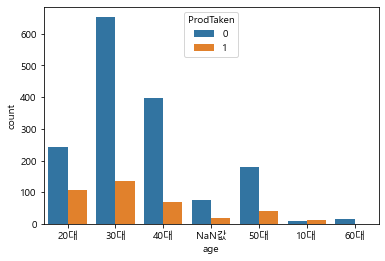

In [408]:
sns.countplot(x='age', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Typeofcontact', ylabel='count'>

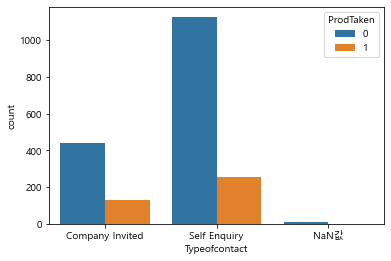

In [409]:
sns.countplot(x='Typeofcontact', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

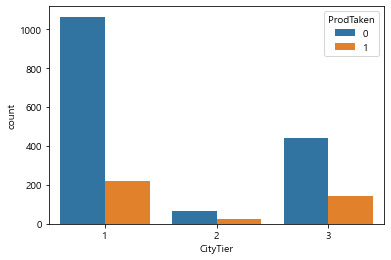

In [410]:
sns.countplot(x='CityTier', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Durationofpitch', ylabel='count'>

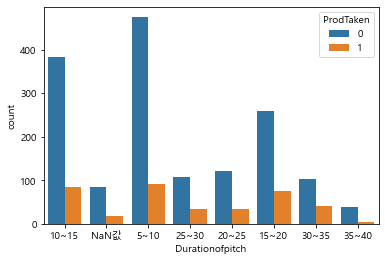

In [411]:
sns.countplot(x='Durationofpitch', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

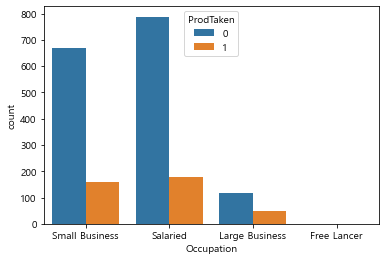

In [412]:
sns.countplot(x='Occupation', hue='ProdTaken' ,data=df2)

In [413]:
df2[df['Occupation']=='Free Lancer']

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MonthlyIncome,ProdTaken,age,Durationofpitch,Monthlyincome,Typeofcontact,Numberoffollowups,Preferredpropertystar,Numberoftrips,Numberofchildrenvisiting
485,486,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,17090.0,1,30대,5~10,10000대,Self Enquiry,4,3,7,0


In [414]:
df['Occupation'].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

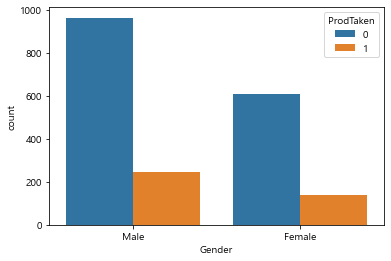

In [415]:
sns.countplot(x='Gender', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

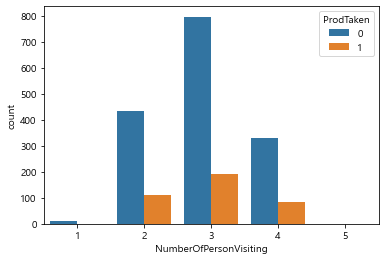

In [416]:
sns.countplot(x='NumberOfPersonVisiting', hue='ProdTaken' ,data=df2)

In [417]:
df2[df2['NumberOfPersonVisiting']==5]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MonthlyIncome,ProdTaken,age,Durationofpitch,Monthlyincome,Typeofcontact,Numberoffollowups,Preferredpropertystar,Numberoftrips,Numberofchildrenvisiting
408,409,60.0,Self Enquiry,3,32.0,Salaried,Female,5,4.0,Standard,...,26315.0,0,60대,30~35,20000대,Self Enquiry,4,5,2,2


<AxesSubplot:xlabel='Numberoffollowups', ylabel='count'>

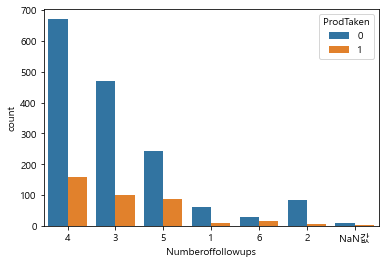

In [418]:
sns.countplot(x='Numberoffollowups', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

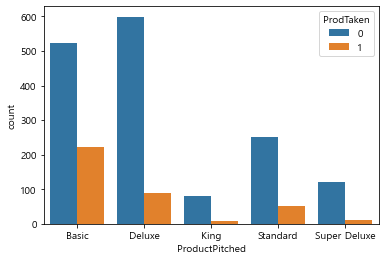

In [419]:
sns.countplot(x='ProductPitched', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Preferredpropertystar', ylabel='count'>

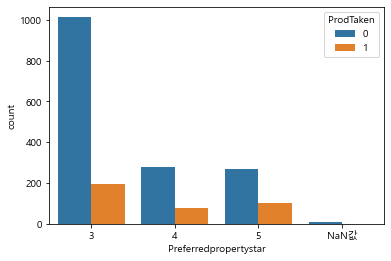

In [420]:
sns.countplot(x='Preferredpropertystar', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

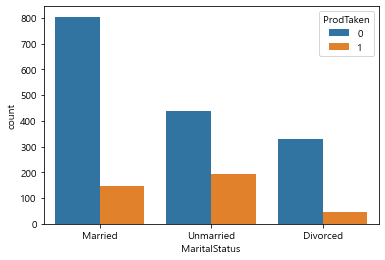

In [421]:
sns.countplot(x='MaritalStatus', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Numberoftrips', ylabel='count'>

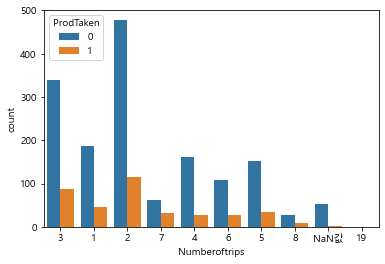

In [422]:
sns.countplot(x='Numberoftrips', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Passport', ylabel='count'>

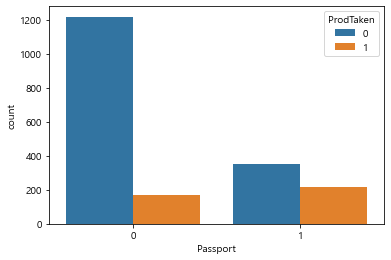

In [423]:
sns.countplot(x='Passport', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='count'>

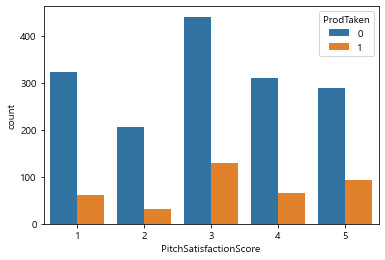

In [424]:
sns.countplot(x='PitchSatisfactionScore', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

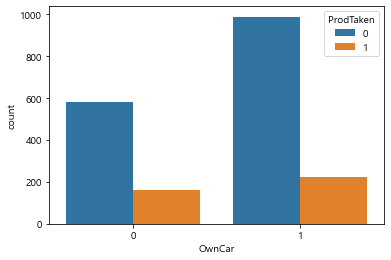

In [425]:
sns.countplot(x='OwnCar', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Numberofchildrenvisiting', ylabel='count'>

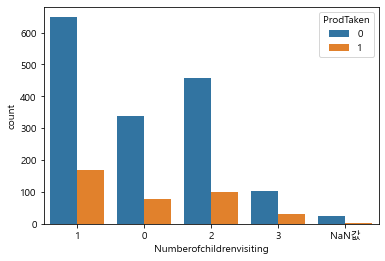

In [426]:
sns.countplot(x='Numberofchildrenvisiting', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Designation', ylabel='count'>

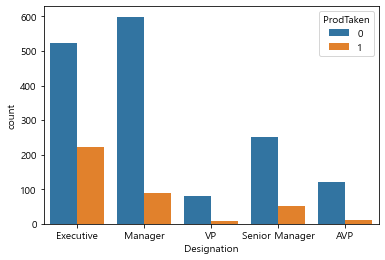

In [427]:
sns.countplot(x='Designation', hue='ProdTaken' ,data=df2)

<AxesSubplot:xlabel='Monthlyincome', ylabel='count'>

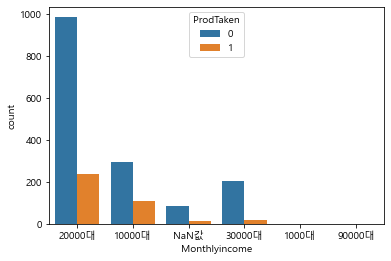

In [74]:
sns.countplot(x='Monthlyincome', hue='ProdTaken' ,data=df2)

In [75]:
df2[(df2['Monthlyincome']=='1000대')|(df2['Monthlyincome']=='90000대')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,age,Durationofpitch,Monthlyincome
189,190,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,...,1,5,0,0.0,Manager,1000.0,0,30대,5~10,1000대
604,605,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,1,2,1,0.0,Executive,95000.0,0,30대,10~15,90000대
1338,1339,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,...,1,2,1,1.0,Executive,98678.0,0,30대,10~15,90000대


In [1]:
## 데이터 가공을 통해 결측치를 처리하는데 있어서 방향성을 제시해줄 수 있을줄 알았는데 활용하지를 못했다

## 결측치 처리

In [430]:
df1.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

- Age 결측치 처리

In [431]:
## age와 maritalstatus의 종류별 결측치가 각각 얼만큼 존재하는지 확인

In [432]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Married')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
13,14,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN,0
26,27,NaN,Self Enquiry,1,6.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,0,1,1,0.0,Executive,18591.0,0
35,36,NaN,Self Enquiry,2,14.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,3.0,0,3,1,1.0,Manager,NaN,0
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
127,128,NaN,Company Invited,1,11.0,Salaried,Male,2,1.0,Deluxe,5.0,Married,2.0,0,5,1,1.0,Manager,NaN,0
137,138,NaN,Self Enquiry,3,35.0,Salaried,Male,3,3.0,Deluxe,5.0,Married,1.0,0,1,1,0.0,Manager,NaN,0
139,140,NaN,Self Enquiry,1,7.0,Small Business,Male,3,3.0,Basic,4.0,Married,1.0,1,4,1,2.0,Executive,18579.0,0
164,165,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN,1
184,185,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,1,1,1.0,Manager,18540.0,0
199,200,NaN,Company Invited,1,24.0,Salaried,Male,2,1.0,Basic,3.0,Married,5.0,0,5,1,1.0,Executive,18688.0,0


In [433]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Single')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


In [434]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Divorced')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
124,125,NaN,Self Enquiry,3,8.0,Small Business,Female,2,3.0,Deluxe,3.0,Divorced,3.0,0,5,1,0.0,Manager,NaN,0
179,180,NaN,Self Enquiry,3,9.0,Salaried,Male,3,3.0,Deluxe,5.0,Divorced,2.0,1,4,1,0.0,Manager,NaN,0
312,313,NaN,Self Enquiry,1,6.0,Small Business,Male,3,3.0,Basic,4.0,Divorced,1.0,1,4,1,2.0,Executive,18579.0,0
630,631,NaN,Company Invited,1,6.0,Salaried,Female,3,3.0,Deluxe,5.0,Divorced,2.0,0,5,1,2.0,Manager,NaN,0
637,638,NaN,Self Enquiry,1,14.0,Salaried,Male,3,3.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,18697.0,0
701,702,NaN,Self Enquiry,1,6.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,2.0,1,2,0,0.0,Executive,18622.0,0
717,718,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Divorced,6.0,0,5,1,1.0,Executive,NaN,1
722,723,NaN,Company Invited,3,10.0,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,2,1,0.0,Manager,NaN,0
905,906,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,3.0,Divorced,1.0,1,2,1,0.0,Manager,NaN,0
1167,1168,NaN,Self Enquiry,1,10.0,Salaried,Male,1,3.0,Deluxe,3.0,Divorced,1.0,1,4,0,0.0,Manager,NaN,0


In [435]:
df1.groupby('MaritalStatus').describe().Age

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,355.0,38.887324,9.535466,22.0,32.0,37.0,45.5,61.0
Married,905.0,37.761326,8.493650,21.0,31.0,37.0,43.0,61.0
Unmarried,601.0,36.169717,9.821464,18.0,30.0,35.0,42.0,61.0


In [436]:
df1[(df1['Age'].isnull())&(df1['Designation']=='Executive')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
26,27,NaN,Self Enquiry,1,6.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,0,1,1,0.0,Executive,18591.0,0
87,88,NaN,Self Enquiry,2,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,1,0,0.0,Executive,18539.0,0
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
139,140,NaN,Self Enquiry,1,7.0,Small Business,Male,3,3.0,Basic,4.0,Married,1.0,1,4,1,2.0,Executive,18579.0,0
164,165,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN,1
199,200,NaN,Company Invited,1,24.0,Salaried,Male,2,1.0,Basic,3.0,Married,5.0,0,5,1,1.0,Executive,18688.0,0
205,206,NaN,Self Enquiry,1,6.0,Salaried,Male,2,4.0,Basic,3.0,Married,2.0,1,1,1,1.0,Executive,18622.0,0
235,236,NaN,Company Invited,1,30.0,Small Business,Male,2,5.0,Basic,3.0,Unmarried,3.0,0,3,0,0.0,Executive,18708.0,0
253,254,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,NaN,1
256,257,NaN,Self Enquiry,1,13.0,Large Business,Female,2,1.0,Basic,3.0,Married,2.0,0,3,0,0.0,Executive,18376.0,0


In [437]:
## MaritalStatus의 각각 평균값으로 채움
df1['Age']=df1['Age'].fillna(df1.groupby('MaritalStatus')['Age'].transform('mean'))

- DurationOfPitch 결측치 처리

In [438]:
df1[df1['DurationOfPitch'].isnull()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Unmarried,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
8,9,36.0,Company Invited,3,NaN,Small Business,Female,2,1.0,Deluxe,5.0,Divorced,3.0,0,1,1,0.0,Manager,19639.0,0
50,51,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Married,1.0,0,3,1,1.0,Manager,NaN,0
60,61,26.0,Self Enquiry,1,NaN,Salaried,Male,3,4.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,19796.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1898,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN,1
1911,1912,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,0.0,Executive,NaN,0
1912,1913,32.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,1.0,0,4,1,2.0,Manager,NaN,0
1946,1947,43.0,Company Invited,1,NaN,Small Business,Female,3,2.0,Basic,3.0,Unmarried,5.0,0,3,0,2.0,Executive,19739.0,0


In [439]:
df2['DurationOfPitch'].mode()

0    9.0
dtype: float64

In [440]:
## DurationOfPitch는 최빈값으로 채워줌
df1['DurationOfPitch']=df1['DurationOfPitch'].fillna(9.0)

- TypeofContact 결측치 처리

In [441]:
df1['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [442]:
## TypeofContact 최빈값으로 채워줌
df1['TypeofContact']=df1['TypeofContact'].fillna('Self Enquiry')

- NumberOfFollowups 결측치 처리

In [443]:
df1[df1['NumberOfFollowups'].isnull()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
43,44,28.0,Self Enquiry,2,14.0,Small Business,Male,3,NaN,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,19936.0,0
318,319,41.0,Self Enquiry,1,13.0,Small Business,Female,2,NaN,Deluxe,3.0,Unmarried,7.0,0,3,1,0.0,Manager,20003.0,0
341,342,32.0,Self Enquiry,1,15.0,Salaried,Female,3,NaN,Basic,4.0,Unmarried,3.0,0,4,0,2.0,Executive,19939.0,1
345,346,25.0,Self Enquiry,3,16.0,Salaried,Male,2,NaN,Deluxe,3.0,Unmarried,1.0,0,2,0,1.0,Manager,19950.0,0
393,394,28.0,Self Enquiry,3,11.0,Small Business,Male,3,NaN,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,19908.0,0
514,515,31.0,Company Invited,1,6.0,Salaried,Male,2,NaN,Deluxe,5.0,Married,2.0,0,1,1,1.0,Manager,20003.0,0
571,572,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0,1
813,814,36.0,Company Invited,1,10.0,Salaried,Male,3,NaN,Basic,3.0,Married,3.0,0,1,1,2.0,Executive,19959.0,0
1015,1016,22.0,Self Enquiry,1,22.0,Salaried,Male,4,NaN,Basic,3.0,Unmarried,3.0,0,3,1,2.0,Executive,19910.0,0
1080,1081,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Unmarried,2.0,0,5,1,0.0,Manager,20010.0,0


In [444]:
## 0으로 채움
df1['NumberOfFollowups']=df1['NumberOfFollowups'].fillna(0)

- PreferredPropertyStar 결측치 처리

In [445]:
df1['PreferredPropertyStar'].mode()

0    3.0
dtype: float64

In [446]:
## PreferredPropertyStar 최빈값으로 채워줌
df1['PreferredPropertyStar']=df1['PreferredPropertyStar'].fillna(3.0)

- NumberOfTrips 결측치 처리

In [447]:
df1['NumberOfTrips'].mode()

0    2.0
dtype: float64

In [448]:
## NumberOfTrips 최빈값으로 채워줌
df1['NumberOfTrips']=df1['NumberOfTrips'].fillna(2.0)

- NumberOfChildrenVisiting 결측치 처리

In [449]:
df1['NumberOfChildrenVisiting'].value_counts()

1.0    819
2.0    559
0.0    416
3.0    134
Name: NumberOfChildrenVisiting, dtype: int64

In [450]:
df1['NumberOfChildrenVisiting'].mode()

0    1.0
dtype: float64

In [451]:
## NumberOfChildrenVisiting 최빈값으로 채워줌
df1['NumberOfChildrenVisiting']=df1['NumberOfChildrenVisiting'].fillna(1.0)

- MonthlyIncome 결측치 처리

In [452]:
df[(df['MonthlyIncome'].isnull())&(df['Designation']=='Executive')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
83,84,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,1,1.0,Executive,NaN,1
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
164,165,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN,1
253,254,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,NaN,1
270,271,NaN,Self Enquiry,1,6.0,Salaried,Male,3,4.0,Basic,3.0,Single,1.0,1,5,0,2.0,Executive,NaN,1
362,363,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN,0
395,396,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN,1
477,478,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN,0
495,496,NaN,Company Invited,1,10.0,Large Business,Male,3,4.0,Basic,3.0,Single,6.0,0,5,0,0.0,Executive,NaN,1
525,526,NaN,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,0,4,1,1.0,Executive,NaN,1


In [453]:
df1.groupby('Designation').describe().MonthlyIncome

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
AVP,130.0,32148.438462,3091.784939,17705.0,30743.50,32129.0,34924.25,36602.0
Executive,710.0,20110.209859,4737.225047,16009.0,17694.25,20749.5,21455.00,98678.0
Manager,624.0,22614.373397,2510.746855,1000.0,20744.75,22956.0,24240.00,35558.0
Senior Manager,302.0,26715.056291,2856.902971,17875.0,25018.00,26327.0,28749.25,38395.0
VP,89.0,35796.179775,2468.671775,21195.0,34232.00,34943.0,37822.00,38651.0


In [454]:
## Designation이 MonthlyIncome에 영향을 미칠것 같아서 Dsignation별 MonthlyIncome의 평균값으로 결측치 채움
df1['MonthlyIncome']=df1['MonthlyIncome'].fillna(df1.groupby('Designation')['MonthlyIncome'].transform('mean'))

In [455]:
df1.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

## 라벨인코딩

In [458]:
df3=df1.copy()

In [459]:
object_columns = df3.columns[df3.dtypes=='object']
print('object 칼럼:', list(object_columns))

object 칼럼: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [461]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

for o_col in object_columns:
    encoder=LabelEncoder()
    encoder.fit(df3[o_col])
    df3[o_col]=encoder.transform(df3[o_col])
    
df3

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.000000,0
1,2,34.0,1,3,9.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.000000,1
2,3,45.0,0,1,9.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,22614.373397,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.000000,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.000000,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.000000,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.000000,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.000000,0


## 스케일링

In [462]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(df1[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']])
df1[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']]=scaler.transform(df1[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']])

## XGBoost 

In [463]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [469]:
df3=df3.drop(['id'], axis=1)

In [470]:
x=df3.drop(['ProdTaken'], axis=1)
y=df3['ProdTaken']
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.3)

In [471]:
xgb=XGBClassifier(n_estimators=400)
xgb.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [472]:
xgb_prd=xgb.predict(test_x)

In [473]:
from sklearn.metrics import accuracy_score
print('예측정확도:{0:.2f}'.format(accuracy_score(test_y, xgb_prd)))

예측정확도:0.87


## 랜덤포레스트

In [474]:
from sklearn.ensemble import RandomForestClassifier

In [475]:
X=df3.drop(['ProdTaken'], axis=1)
Y=df3['ProdTaken']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3)

In [476]:
forest=RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [477]:
prediction=forest.predict(X_test)

In [478]:
from sklearn.metrics import accuracy_score
print('예측정확도:{0:.2f}'.format(accuracy_score(Y_test, prediction)))

예측정확도:0.87


## Test set

In [479]:
test=pd.read_csv('test.csv')
test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [480]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [481]:
test['Age']=test['Age'].fillna(test.groupby('MaritalStatus')['Age'].transform('mean'))

In [482]:
test['DurationOfPitch'].mode()

0    9.0
dtype: float64

In [483]:
test['DurationOfPitch']=test['DurationOfPitch'].fillna(9.0)

In [484]:
test['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [485]:
test['TypeofContact']=test['TypeofContact'].fillna('Self Enquiry')

In [486]:
test['NumberOfFollowups']=test['NumberOfFollowups'].fillna(0)

In [487]:
test['PreferredPropertyStar'].mode()

0    3.0
dtype: float64

In [488]:
test['PreferredPropertyStar']=test['PreferredPropertyStar'].fillna(3.0)

In [489]:
test['NumberOfTrips'].mode()

0    2.0
dtype: float64

In [490]:
test['NumberOfTrips']=test['NumberOfTrips'].fillna(2.0)

In [491]:
test['NumberOfChildrenVisiting'].mode()

0    1.0
dtype: float64

In [492]:
test['NumberOfChildrenVisiting']=test['NumberOfChildrenVisiting'].fillna(1.0)

In [493]:
test['MonthlyIncome']=test['MonthlyIncome'].fillna(test.groupby('Designation')['MonthlyIncome'].transform('mean'))

In [494]:
test.replace('Fe Male','Female', inplace=True)

In [495]:
test.replace('Single','Unmarried', inplace=True)

In [496]:
# 라벨 인코딩

for o_col in object_columns:
    encoder=LabelEncoder()
    encoder.fit(df1[o_col])
    test[o_col]=encoder.transform(test[o_col])

In [499]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2933 non-null   float64
 2   TypeofContact             2933 non-null   int32  
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2933 non-null   float64
 5   Occupation                2933 non-null   int32  
 6   Gender                    2933 non-null   int32  
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2933 non-null   float64
 9   ProductPitched            2933 non-null   int32  
 10  PreferredPropertyStar     2933 non-null   float64
 11  MaritalStatus             2933 non-null   int32  
 12  NumberOfTrips             2933 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [500]:
test=test.drop(['id'], axis=1)

In [501]:
xgb_pred=xgb.predict(test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [503]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [504]:
sample_submission['ProdTaken'] = xgb_pred
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [505]:
sample_submission.to_csv('submission(6).csv', index=False)